In [518]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

4.1 Data exploration

In [519]:
# Read .csv file
df = pd.read_csv("CarPrice.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [520]:
df = df.drop(columns=['CarName','car_ID'])
df.info

<bound method DataFrame.info of      symboling fueltype aspiration doornumber      carbody drivewheel  \
0            3      gas        std        two  convertible        rwd   
1            3      gas        std        two  convertible        rwd   
2            1      gas        std        two    hatchback        rwd   
3            2      gas        std       four        sedan        fwd   
4            2      gas        std       four        sedan        4wd   
..         ...      ...        ...        ...          ...        ...   
200         -1      gas        std       four        sedan        rwd   
201         -1      gas      turbo       four        sedan        rwd   
202         -1      gas        std       four        sedan        rwd   
203         -1   diesel      turbo       four        sedan        rwd   
204         -1      gas      turbo       four        sedan        rwd   

    enginelocation  wheelbase  carlength  carwidth  ...  enginesize  \
0            front  

In [521]:
# df.fillna()
df.describe()
df.dropna()
df.dtypes

symboling             int64
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

4.1 (b) Data Transform and Feature Selection

StandardScaler()
[8.34146341e-01 9.87565854e+01 1.74049268e+02 6.59078049e+01
 5.37248780e+01 2.55556585e+03 1.26907317e+02 3.32975610e+00
 3.25541463e+00 1.01425366e+01 1.04117073e+02 5.12512195e+03
 2.52195122e+01 3.07512195e+01 1.32767106e+04]


<AxesSubplot:>

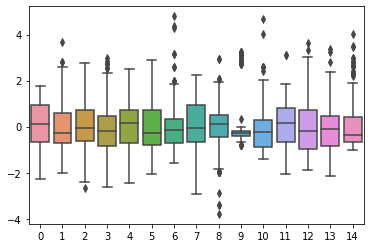

In [522]:
#Data Transformation
X = df.drop(columns=['fuelsystem','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','cylindernumber','enginetype'])
y= df[['fuelsystem','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','cylindernumber','enginetype']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X))

print(scaler.mean_)

X_standard = scaler.transform(X)
 
sns.boxplot(data=X_standard)

                  symboling  wheelbase  carlength  carwidth  carheight  \
symboling          1.000000  -0.531954  -0.357612 -0.232919  -0.541038   
wheelbase         -0.531954   1.000000   0.874587  0.795144   0.589435   
carlength         -0.357612   0.874587   1.000000  0.841118   0.491029   
carwidth          -0.232919   0.795144   0.841118  1.000000   0.279210   
carheight         -0.541038   0.589435   0.491029  0.279210   1.000000   
curbweight        -0.227691   0.776386   0.877728  0.867032   0.295572   
enginesize        -0.105790   0.569329   0.683360  0.735433   0.067149   
boreratio         -0.130051   0.488750   0.606454  0.559150   0.171071   
stroke            -0.008735   0.160959   0.129533  0.182942  -0.055307   
compressionratio  -0.178515   0.249786   0.158414  0.181129   0.261214   
horsepower         0.070873   0.353294   0.552623  0.640732  -0.108802   
peakrpm            0.273606  -0.360469  -0.287242 -0.220012  -0.320411   
citympg           -0.035823  -0.470414

<AxesSubplot:>

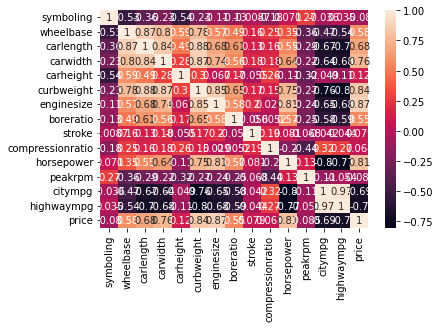

In [523]:
corr = df.corr()
print(corr)
sns.heatmap(corr,annot=True)


In [524]:
lower = pd.DataFrame(np.tril(corr, -1),columns = corr.columns)
print(lower)

    symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0    0.000000   0.000000   0.000000  0.000000   0.000000    0.000000   
1   -0.531954   0.000000   0.000000  0.000000   0.000000    0.000000   
2   -0.357612   0.874587   0.000000  0.000000   0.000000    0.000000   
3   -0.232919   0.795144   0.841118  0.000000   0.000000    0.000000   
4   -0.541038   0.589435   0.491029  0.279210   0.000000    0.000000   
5   -0.227691   0.776386   0.877728  0.867032   0.295572    0.000000   
6   -0.105790   0.569329   0.683360  0.735433   0.067149    0.850594   
7   -0.130051   0.488750   0.606454  0.559150   0.171071    0.648480   
8   -0.008735   0.160959   0.129533  0.182942  -0.055307    0.168790   
9   -0.178515   0.249786   0.158414  0.181129   0.261214    0.151362   
10   0.070873   0.353294   0.552623  0.640732  -0.108802    0.750739   
11   0.273606  -0.360469  -0.287242 -0.220012  -0.320411   -0.266243   
12  -0.035823  -0.470414  -0.670909 -0.642704  -0.048640   -0.75

In [525]:
to_drop = [column for column in lower if any(lower[column] > 0.86)]
print(to_drop)
df = df.drop(columns = to_drop)
print (df)
print (df.describe())

['wheelbase', 'carlength', 'carwidth', 'enginesize', 'citympg']
     symboling fueltype aspiration doornumber      carbody drivewheel  \
0            3      gas        std        two  convertible        rwd   
1            3      gas        std        two  convertible        rwd   
2            1      gas        std        two    hatchback        rwd   
3            2      gas        std       four        sedan        fwd   
4            2      gas        std       four        sedan        4wd   
..         ...      ...        ...        ...          ...        ...   
200         -1      gas        std       four        sedan        rwd   
201         -1      gas      turbo       four        sedan        rwd   
202         -1      gas        std       four        sedan        rwd   
203         -1   diesel      turbo       four        sedan        rwd   
204         -1      gas      turbo       four        sedan        rwd   

    enginelocation  carheight  curbweight enginetype cylind

In [526]:
y=pd.get_dummies(y, columns = y.columns, drop_first=True)
df = X.join(y)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    int64  
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    int64  
 6   enginesize             205 non-null    int64  
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  citympg                205 non-null    int64  
 13  highwaympg             205 non-null    int64  
 14  price                  205 non-null    float64
 15  fuelsy

4.2 PCA Dimensional Reduction

[[-8.00708250e-01 -2.64671817e+00 -1.01644319e-01 ...  3.01870301e-01
   1.93545440e-01  3.17513018e-03]
 [-6.80901156e-01 -2.68273865e+00 -1.49995373e-01 ...  2.11922074e-01
   2.25927963e-01  2.40472645e-02]
 [ 3.74819393e-01 -1.30286357e+00 -9.34952601e-01 ... -3.04916502e-01
   2.41284305e-02 -1.27800094e-01]
 ...
 [ 3.57665217e+00  1.95286257e-01  1.88293767e+00 ...  2.50578739e-01
  -3.45729819e-01 -1.33809908e-01]
 [ 2.50818558e+00  3.12640685e+00 -1.29519335e+00 ... -1.60535309e-01
  -5.83845242e-02  2.48687491e-01]
 [ 3.38807000e+00  6.92259119e-01  1.40229575e+00 ... -2.74881271e-02
   1.10067692e-01 -1.69631267e-01]]
Explained Variance ratio =  [0.49737394 0.17573473 0.08527536 0.06301976 0.0418972  0.03684286
 0.02829451 0.02267827 0.0174146  0.00894471 0.00778045 0.00530398
 0.00480471 0.00336544 0.00126947]


<BarContainer object of 15 artists>

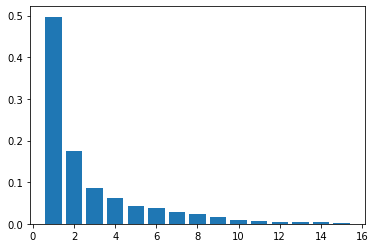

In [527]:
# PCA all variables (after standardized data)
pca = PCA()
X_pca = pca.fit_transform(X_standard)
print(X_pca)

print('Explained Variance ratio = ', pca.explained_variance_ratio_)
# Visualize Explained Variance (eigenvalues)
plt.bar([i for i in range(1,16)],pca.explained_variance_ratio_)

In [528]:
print('Explained Variance (eigenvalues) = ', pca.explained_variance_)
print('--------------------------------------------')
print('PCA components (eigenvectors) ')
print(pca.components_[0:2,:])
print(len(pca.components_))

Explained Variance (eigenvalues) =  [7.49718071 2.64894268 1.28540066 0.94993025 0.63153865 0.5553519
 0.42649817 0.3418416  0.26249948 0.13482831 0.11727889 0.0799497
 0.07242397 0.05072905 0.01913538]
--------------------------------------------
PCA components (eigenvectors) 
[[-0.09131161  0.29215047  0.330765    0.32700956  0.112739    0.35409154
   0.31813193  0.2617828   0.05233245  0.01882323  0.2906172  -0.08079524
  -0.30042173 -0.3112147   0.31773174]
 [-0.39512189  0.28696477  0.15076723  0.07051924  0.42344769  0.03161237
  -0.075211   -0.02238866  0.06183457  0.41258307 -0.29673464 -0.39573518
   0.26931223  0.21679561 -0.0955273 ]]
15


In [529]:
# PCA all variables (after standardized data)
pca_li = []
for i in range(5,20,5) :
    pca = PCA(n_components=i)
    X_pca = pca.fit_transform(X_standard)
    # print(X_pca_2)
    pca_li.append(X_pca)


In [530]:
# print('Explained Variance ratio = ', pca2.explained_variance_ratio_)
# #  Visualize Explained Variance (eigenvalues)
# plt.bar([i for i in range(1,4)],pca2.explained_variance_ratio_)

4.3 Linear Regression

In [531]:
# Shuffle Split (Train / Test Split)
Rseed = 50
for elm in pca_li :
    x_train_set, x_test, y_train_set, y_test = train_test_split(elm,df['price'], test_size = 0.3, random_state = Rseed)
    x_train, x_validate, y_train, y_validate = train_test_split(x_train_set, y_train_set, test_size = 0.3, random_state = Rseed)
    # Perform Linear Regression -> All variables
    lr = LinearRegression()
    # Train
    lr.fit(x_train, y_train)
    # Validate
    y_pred_lr = lr.predict(x_validate)
    # Test
    y_test_pred_lr = lr.predict(x_test)
    # Measure Accuracy Validation and Test
    print(r2_score(y_pred_lr, y_validate))
    r2_score(y_test_pred_lr, y_test)
    lr.score(x_validate, y_validate)
    lr.score(x_test, y_test)

0.7131355654794644
0.9197015008808579
1.0
